## Aprendizaje No Supervisado

En esta sección vamos a analizar para nuestro barrio de estudio dos conjuntos de datos. Uno procesado y otro no procesado, para visualziar cual de los dos conjuntos es verdaderamente más útil para extraer conclusiones. En nuestro caso usaremos el método de KMeans.

Para ello importaremos las librerías necesarias y estableceremos la ruta de trabajo.

In [2]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import MinMaxScaler
import numpy as np
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\notebooks
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


Importaremos nuestros datos a una variable.

In [3]:
df = pd.read_csv("./data/interim/estaciones.csv")
df.tail()

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
268,272,673,Vicente la Roda - Ingeniero Fausto Elio,39.480623,-0.332190,15,LA MALVA-ROSA,11,3
269,273,340,Moraira - Alta del Mar,39.450305,-0.333272,15,NATZARET,11,5
270,274,216,San Francisco de Paula - Castell de Pop,39.448070,-0.333188,15,NATZARET,11,5
271,275,418,Moreras - Rona de Nazaret,39.452305,-0.335065,20,LA PUNTA,10,6
272,276,1029,Veles e Vents,39.461975,-0.323765,20,EL GRAU,11,1


# KMEANS

Definiremos la función creada para realizar el método de KMeans.

In [82]:
def plot_kmeans(df, max_k=10):
    """
    Plots KMeans clustering and the elbow method for determining the optimal k.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        max_k (int): Maximum number of clusters to test.
    """
    ls_cols = ['lon', 'lat', 'uso_bici']
    X = df.loc[:, ls_cols].values

    # Calculate inertia for different values of k
    inertia = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=22, n_init="auto").fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Plotting
    mosaicstr = """
    ab
    """
    fig, ax = plt.subplot_mosaic(mosaic=mosaicstr, figsize=(10, 5))

    # Plot KMeans clustering for the last k
    kn = max_k # using the max_k for the final plot.
    kmeans = KMeans(n_clusters=kn, random_state=22, n_init="auto").fit(X)
    labels1 = kmeans.labels_
    centroids1 = kmeans.cluster_centers_
    
    # Marcar las estaciones de AIORA (o cualquier barrio)
    if 'nombre' in df.columns:
        campanar_mask = df['nombre'] == 'CAMPANAR'
        ax['b'].scatter(df.loc[campanar_mask, ls_cols[0]],
                        df.loc[campanar_mask, ls_cols[1]],
                        facecolors='none', edgecolors='green', linewidths=2, s=80, label='CAMPANAR')

    ax['b'].set_title(f"Clustering distribution k={kn}")
    ax['b'].set(xlabel=ls_cols[0], ylabel=ls_cols[1])
    axb = ax['b'].scatter(X[:, 0], X[:, 1], c=labels1, cmap='Dark2', s=10)
    cbar = plt.colorbar(axb)
    cbar.set_label('k-clusters')
    ax['b'].scatter(centroids1[:, 0], centroids1[:, 1], marker='x',
                    s=200, c='black')

    # Codo
    ax['a'].plot(range(2, max_k + 1), inertia, marker='o')
    ax['a'].set_title('Elbow Method')
    ax['a'].set_xlabel('Number of clusters (k)')
    ax['a'].set_ylabel('Inertia')

    fig.tight_layout()
    plt.show()
    return kmeans.get_params()

Y definiremos los parámetros necesarios.

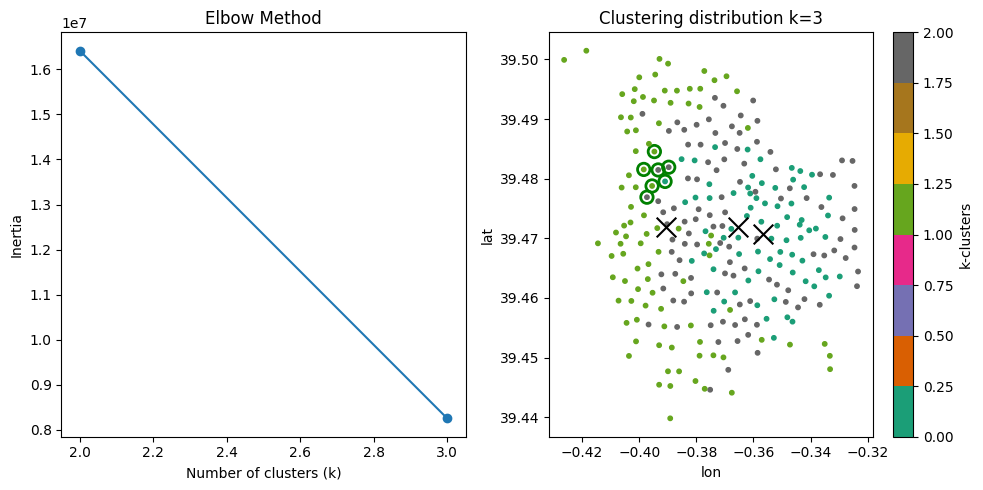

In [85]:
params = plot_kmeans(df, 3)

In [87]:
ls_cols = ['lon', 'lat', 'uso_bici']
X = df.loc[:, ls_cols].values
params['n_clusters'] = 3
kmeans = KMeans(**params).fit(X)
silhouette_score(X, kmeans.labels_), kmeans.inertia_

(np.float64(0.5676212447485822), 8257797.961663779)

Esto está realizado con los datos originales de la carpeta interim. ¿Que sucede si se usan los datos de la carpeta processed?

In [88]:
df_minmax_processed = pd.read_csv("./data/processed/estaciones.csv")
df_minmax_processed

,lon,lat,uso_bici,barrio,nombre
0,0.421284,0.652642,0.432237,EL CARME,EL CARME
1,0.452208,0.650161,0.400962,EL CARME,EL CARME
2,0.446958,0.600597,0.482759,EL CARME,EL CARME
3,0.495042,0.599169,0.561748,LA SEU,LA SEU
4,0.535893,0.601571,0.399358,LA XEREA,LA XEREA
...,...,...,...,...,...
268,0.914556,0.662073,0.269848,LA MALVA-ROSA,LA MALVA-ROSA
269,0.904036,0.170034,0.136327,NATZARET,NATZARET
270,0.904853,0.133761,0.086608,NATZARET,NATZARET
271,0.886605,0.202492,0.167602,LA PUNTA,LA PUNTA


Enviaremos estos datos a nuestra función y nos devolverá el resultado.

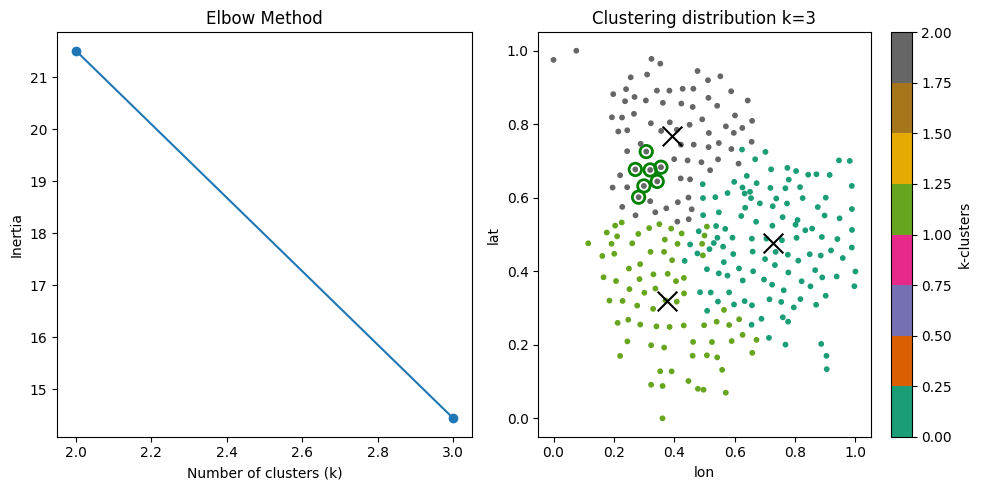

In [89]:
# Que hago con esto?
campanar = df_minmax_processed[df_minmax_processed["barrio"] == "CAMPANAR"]
lon_data = len(campanar)-1
# Solo hay 7 puntos y los cluster maximos son n-1 (6)

params = plot_kmeans(df_minmax_processed, 3)

In [90]:
ls_cols = ['lon', 'lat', 'uso_bici']
X = df_minmax_processed.loc[:, ls_cols].values
params['n_clusters'] = 3
kmeans = KMeans(**params).fit(X)
silhouette_score(X, kmeans.labels_), kmeans.inertia_

(np.float64(0.36220454629415066), 14.440701465087255)